# EDA

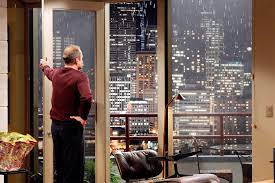

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import pandas as pd
df_house = pd.read_csv('data/Joinedtable.csv') 
df_house


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520     3.000      1.000     1180.000  5650.000   1.000   
1      6414100192     3.000      2.250     2570.000  7242.000   2.000   
2      5631500400     2.000      1.000      770.000 10000.000   1.000   
3      2487200875     4.000      3.000     1960.000  5000.000   1.000   
4      1954400510     3.000      2.000     1680.000  8080.000   1.000   
...           ...       ...        ...          ...       ...     ...   
21592   263000018     3.000      2.500     1530.000  1131.000   3.000   
21593  6600060120     4.000      2.500     2310.000  5813.000   2.000   
21594  1523300141     2.000      0.750     1020.000  1350.000   2.000   
21595   291310100     3.000      2.500     1600.000  2388.000   2.000   
21596  1523300157     2.000      0.750     1020.000  1076.000   2.000   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0             NaN 0.000          3      7  ...          0.000      1955   
1           0.000 0.000          3      7  ...        400.000      1951   
2           0.000 0.000          3      6  ...          0.000      1933   
3           0.000 0.000          5      7  ...        910.000      1965   
4           0.000 0.000          3      8  ...          0.000      1987   
...           ...   ...        ...    ...  ...            ...       ...   
21592       0.000 0.000          3      8  ...          0.000      2009   
21593       0.000 0.000          3      8  ...          0.000      2014   
21594       0.000 0.000          3      7  ...          0.000      2009   
21595         NaN 0.000          3      8  ...          0.000      2004   
21596       0.000 0.000          3      7  ...          0.000      2008   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
0             0.000    98178 47.511 -122.257       1340.000    5650.000   
1         19910.000    98125 47.721 -122.319       1690.000    7639.000   
2               NaN    98028 47.738 -122.233       2720.000    8062.000   
3             0.000    98136 47.521 -122.393       1360.000    5000.000   
4             0.000    98074 47.617 -122.045       1800.000    7503.000   
...             ...      ...    ...      ...            ...         ...   
21592         0.000    98103 47.699 -122.346       1530.000    1509.000   
21593         0.000    98146 47.511 -122.362       1830.000    7200.000   
21594         0.000    98144 47.594 -122.299       1020.000    2007.000   
21595         0.000    98027 47.535 -122.069       1410.000    1287.000   
21596         0.000    98144 47.594 -122.299       1020.000    1357.000   

             date      price  
0      2014-10-13 221900.000  
1      2014-12-09 538000.000  
2      2015-02-25 180000.000  
3      2014-12-09 604000.000  
4      2015-02-18 510000.000  
...           ...        ...  
21592  2014-05-21 360000.000  
21593  2015-02-23 400000.000  
21594  2014-06-23 402101.000  
21595  2015-01-16 400000.000  
21596  2014-10-15 325000.000  

[21597 rows x 21 columns]

In [3]:
df_house.tail()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21592   263000018     3.000      2.500     1530.000  1131.000   3.000   
21593  6600060120     4.000      2.500     2310.000  5813.000   2.000   
21594  1523300141     2.000      0.750     1020.000  1350.000   2.000   
21595   291310100     3.000      2.500     1600.000  2388.000   2.000   
21596  1523300157     2.000      0.750     1020.000  1076.000   2.000   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
21592       0.000 0.000          3      8  ...          0.000      2009   
21593       0.000 0.000          3      8  ...          0.000      2014   
21594       0.000 0.000          3      7  ...          0.000      2009   
21595         NaN 0.000          3      8  ...          0.000      2004   
21596       0.000 0.000          3      7  ...          0.000      2008   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
21592         0.000    98103 47.699 -122.346       1530.000    1509.000   
21593         0.000    98146 47.511 -122.362       1830.000    7200.000   
21594         0.000    98144 47.594 -122.299       1020.000    2007.000   
21595         0.000    98027 47.535 -122.069       1410.000    1287.000   
21596         0.000    98144 47.594 -122.299       1020.000    1357.000   

             date      price  
21592  2014-05-21 360000.000  
21593  2015-02-23 400000.000  
21594  2014-06-23 402101.000  
21595  2015-01-16 400000.000  
21596  2014-10-15 325000.000  

[5 rows x 21 columns]

In [4]:
df_house.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

In [5]:
df_house.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [6]:
df_house.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

In [7]:
type(df_house['date'][0])

str

In [8]:
df_house['date'] = pd.to_datetime(df_house['date'],format='%Y-%m-%d')
type(df_house['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
type(df_house['yr_built'][0])

numpy.int64

In [10]:
df_house['yr_built'] = pd.to_datetime(df_house['yr_built'],format='%Y')
type(df_house['yr_built'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
type(df_house['yr_renovated'][0])

numpy.float64

In [12]:
#Checking for nan values
df_house.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [13]:
#Filling with 0 since the nan values are very small percentage of our data set only between 0.5 to 3 percent
df_house.fillna(0, inplace=True)

In [14]:
df_house['yr_renovated']

0           0.000
1       19910.000
2           0.000
3           0.000
4           0.000
           ...   
21592       0.000
21593       0.000
21594       0.000
21595       0.000
21596       0.000
Name: yr_renovated, Length: 21597, dtype: float64

We can see that year renovated has a lot of 0 values. Assuming that those 0 values mean the house hasnt been renovated

In [15]:
df_house['yr_renovated'] = df_house.yr_renovated.astype('int')
type(df_house['yr_renovated'][0])

numpy.int64

<Axes: >

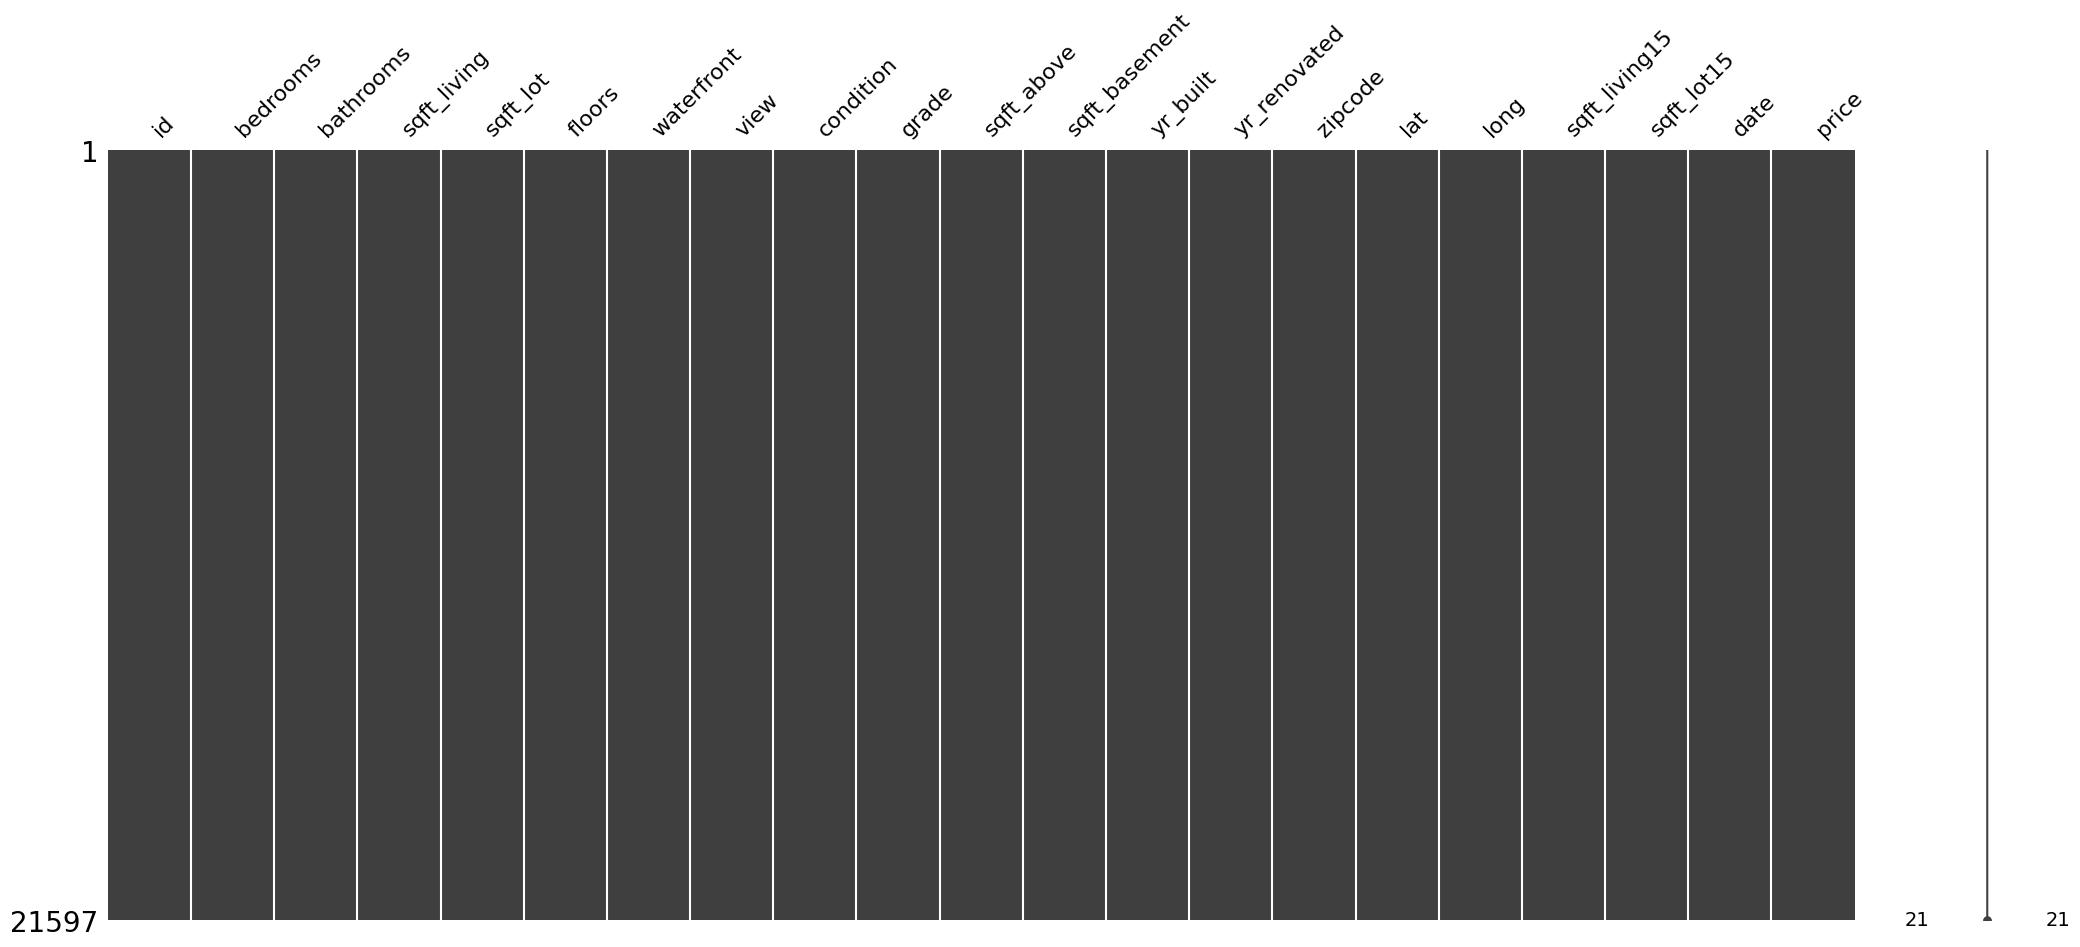

In [16]:
msno.matrix(df_house)

In [17]:
#to remove all the zeros at the end of the values in the column 

df_house.yr_renovated = df_house.yr_renovated / 10


In [18]:
#convert the column as integer again 

df_house['yr_renovated'] = df_house.yr_renovated.astype('int')
type(df_house['yr_renovated'][0])

numpy.int64

In [19]:
df_house_coloumn_Dict = {'bedrooms' : int,  
                         'sqft_living' : int,
                         'sqft_lot' : int, 
                         'floors' : int, 
                         'waterfront' : bool, 
                         'view' : int,
                         'sqft_above' : int,
                         'sqft_basement' : int, 
                         'sqft_living15' : int, 
                         'sqft_lot15' : int }

df_house = df_house.astype(df_house_coloumn_Dict)
df_house.dtypes

id                        int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                 bool
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built         datetime64[ns]
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
date             datetime64[ns]
price                   float64
dtype: object


# Project Descriptions and Assumptions

## Problem Statement

Charles Christensen is a seller who invests  in Seattle real estate , he usually intends to invest in properties with big returns. He wants to invest in houses where he can get high returns and he is exploring high value neighbourhoods. He is wondering about the timing of the investment and divestment. Wondering about renovations as well. 
I as a analyst in helping my client to explore various neighbourhoods and give suggestions on the investment. 

We need to define, high value neighbourhoods and what factors/qualities are affecting the neighbourhood prices.  

If the investor owns house/houses in a particular neighbourhood will determime what factor will bring him maximum return if he sells ?

1. if renovations are needed on the house? 

2. Questions the stakeholder can ask ? 

3. His houses need renovation ? and might take longer to sell ? Dont renovate and sell

## Assumptions

1. The Seller owns few houses in a particular neighbourhood and wants to sell
2. The Seller is looking at other neighbourhoods with potential for investments

## Hypothesis

- Selling the house after renovating would fetch the highest return? 
- Investing in old house would be beneficial for high returns ? 

- Explore different neighbourhoods and choose a neighbourhood 
- Check correlation between renovated houses and prices of the house
- Check the average renovation prices in the area (as a percentage of the total value)
- How to determine if the returns after renovation ? 
- Difference between average prices of the renovated house and and not renovated house ? 

- Price per sqm in neighbourhoods 
- Price per sqm compared to the yr built 




In [20]:
df_house.head(10)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650       1       False   
1  6414100192         3      2.250         2570      7242       2       False   
2  5631500400         2      1.000          770     10000       1       False   
3  2487200875         4      3.000         1960      5000       1       False   
4  1954400510         3      2.000         1680      8080       1       False   
5  7237550310         4      4.500         5420    101930       1       False   
6  1321400060         3      2.250         1715      6819       2       False   
7  2008000270         3      1.500         1060      9711       1       False   
8  2414600126         3      1.000         1780      7470       1       False   
9  3793500160         3      2.500         1890      6560       2       False   

   view  condition  grade  ...  sqft_basement   yr_built yr_renovated  \
0     0          3      7  ...              0 1955-01-01            0   
1     0          3      7  ...            400 1951-01-01         1991   
2     0          3      6  ...              0 1933-01-01            0   
3     0          5      7  ...            910 1965-01-01            0   
4     0          3      8  ...              0 1987-01-01            0   
5     0          3     11  ...           1530 2001-01-01            0   
6     0          3      7  ...              0 1995-01-01            0   
7     0          3      7  ...              0 1963-01-01            0   
8     0          3      7  ...            730 1960-01-01            0   
9     0          3      7  ...              0 2003-01-01            0   

   zipcode    lat     long  sqft_living15  sqft_lot15       date       price  
0    98178 47.511 -122.257           1340        5650 2014-10-13  221900.000  
1    98125 47.721 -122.319           1690        7639 2014-12-09  538000.000  
2    98028 47.738 -122.233           2720        8062 2015-02-25  180000.000  
3    98136 47.521 -122.393           1360        5000 2014-12-09  604000.000  
4    98074 47.617 -122.045           1800        7503 2015-02-18  510000.000  
5    98053 47.656 -122.005           4760      101930 2014-05-12 1230000.000  
6    98003 47.310 -122.327           2238        6819 2014-06-27  257500.000  
7    98198 47.410 -122.315           1650        9711 2015-01-15  291850.000  
8    98146 47.512 -122.337           1780        8113 2015-04-15  229500.000  
9    98038 47.368 -122.031           2390        7570 2015-03-12  323000.000  

[10 rows x 21 columns]

In [26]:
import plotly.express as px

fig = px.scatter_mapbox(df_house, lat="lat", lon="long",     color="yr_built", size="sqft_living15",
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,mapbox_style='open-street-map')
fig.show()

<Axes: xlabel='yr_built', ylabel='price'>

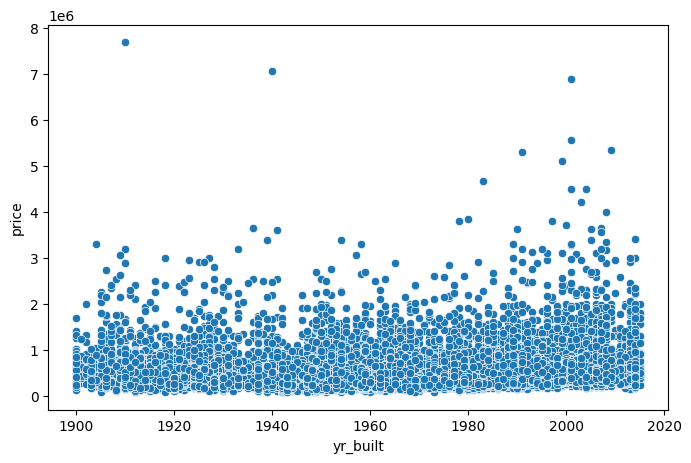

In [27]:
sns.scatterplot(data=df_house, x="yr_built", y="price")

In [28]:
import plotly.express as px

fig = px.scatter_mapbox(df_house, lat="lat", lon="long",     color="price",
                 zoom=5, mapbox_style='carto-positron')
fig.update_layout(width=700, height=1000)
fig.show()

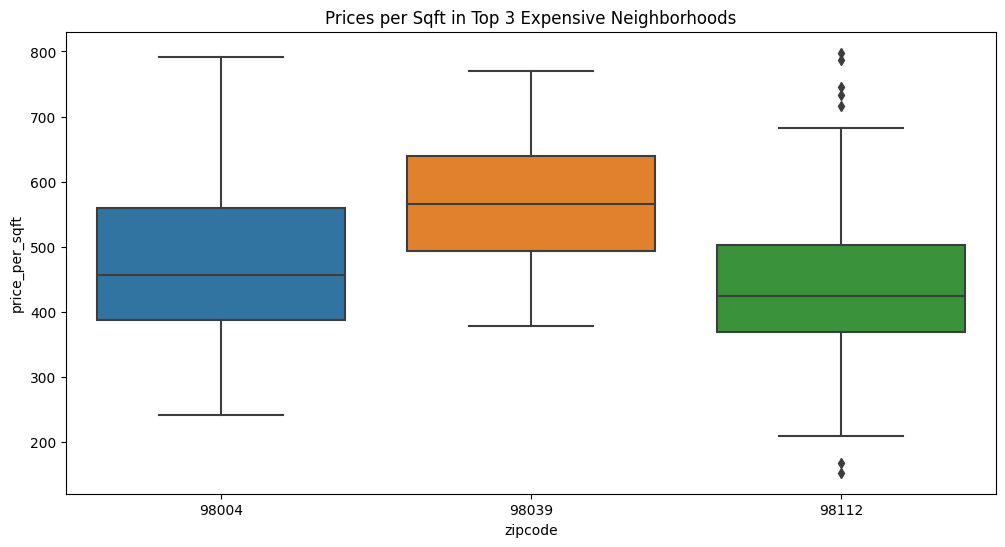

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called 'df_house'
# Calculate price per sqft
df_house['price_per_sqft'] = df_house['price'] / df_house['sqft_living']

# Group by neighborhood and calculate the mean price per sqft
mean_price_per_sqft_by_zipcode = df_house.groupby('zipcode')['price_per_sqft'].mean()

# Get the top 3 most expensive neighborhoods
top_3_expensive_neighborhoods = mean_price_per_sqft_by_zipcode.sort_values(ascending=False).index[:3]

# Filter the data for the top 3 neighborhoods
top_3_expensive_data = df_house[df_house['zipcode'].isin(top_3_expensive_neighborhoods)]

# Visualize prices per sqft in the top 3 most expensive neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(x='zipcode', y='price_per_sqft', data=top_3_expensive_data)
plt.title("Prices per Sqft in Top 3 Expensive Neighborhoods")
plt.show()


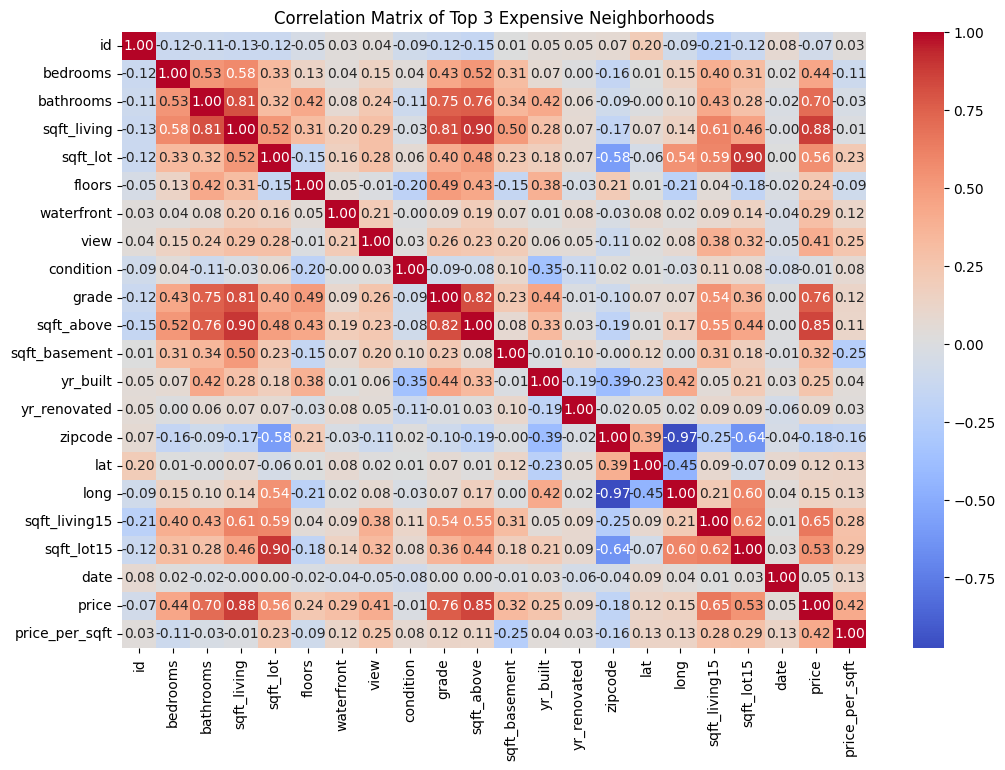

In [34]:
# Continue with the previous code for exploring correlations
correlation_matrix = top_3_expensive_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Top 3 Expensive Neighborhoods")
plt.show()

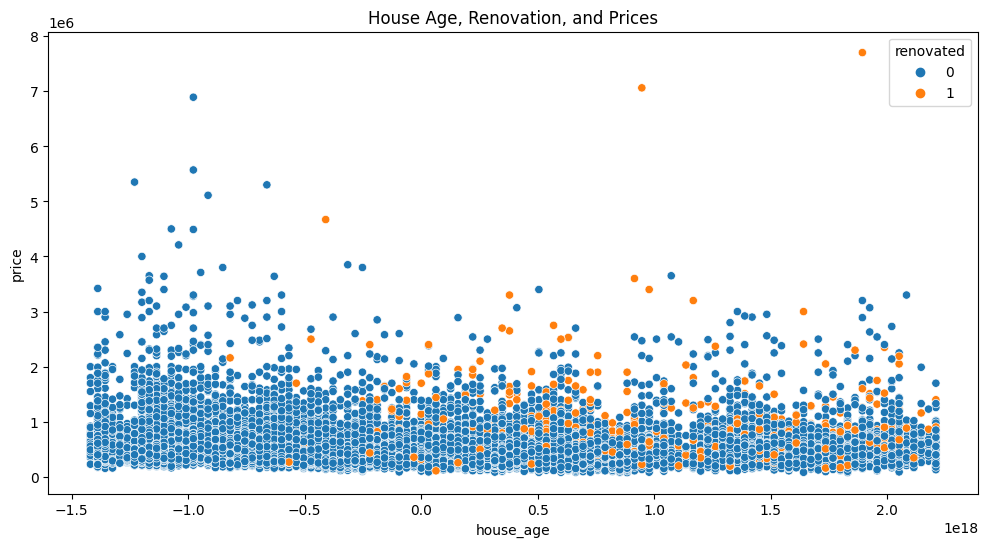

In [39]:
# Convert 'yr_built' to numeric if it's in datetime format
df_house['yr_built'] = pd.to_numeric(df_house['yr_built'], errors='coerce')

# Calculate the age of the house
current_year = 2024  # Change this based on the current year
df_house['house_age'] = current_year - df_house['yr_built']
df_house['renovated'] = df_house['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='house_age', y='price', hue='renovated', data=df_house)
plt.title("House Age, Renovation, and Prices")
plt.show()

In [41]:
# Get the most expensive neighborhood
most_expensive_neighborhood = mean_price_per_sqft_by_zipcode.idxmax()

# Filter the data for the most expensive neighborhood
expensive_neighborhood_data = df_house[df_house['zipcode'] == most_expensive_neighborhood]

# Create a scatter map using Plotly Express
fig = px.scatter_mapbox(expensive_neighborhood_data, 
                        lat="lat", 
                        lon="long", 
                        color="price",
                        size="price",
                        hover_name="price",
                        zoom=12,
                        mapbox_style='carto-positron')

# Update layout for better visualization
fig.update_layout(width=800, height=800, title=f"Most Expensive Neighborhood ({most_expensive_neighborhood})", mapbox_style='carto-positron')
fig.show()

In [42]:
# Create a scatter map using Plotly Express for the top 3 most expensive neighborhoods
fig = px.scatter_mapbox(top_3_expensive_data, 
                        lat="lat", 
                        lon="long", 
                        color="price",
                        size="price",
                        hover_name="price",
                        zoom=10,
                        mapbox_style='carto-positron')

# Update layout for better visualization
fig.update_layout(width=800, height=800, title="Top 3 Most Expensive Neighborhoods", mapbox_style='carto-positron')
fig.show()

In [ ]:

pivot = df_house.pivot_table(index=['zipcode'], values=['price'], aggfunc={'median', 'mean', 'min'})
pivot

In [ ]:
#Price: Check the distribution of housing prices. You can explore the average price, the range of prices, and any outliers. This will help you understand the affordability and market trends in the area.

#Location: Analyze the geographical distribution of properties. You can examine which neighborhoods or areas have the most and least number of listings, and whether there are any spatial patterns that might be of interest.

#Property Features: Examine the relationship between specific property features (e.g., number of bedrooms, bathrooms, square footage, amenities like a pool or garage) and the price. This can help you understand which features are driving property values in the market.

In [ ]:
df_house

In [ ]:
#corelation between water front and prices 

correlation_wf_prices = df_house['price_per_sqft'].corr(df_house['waterfront'])
correlation_wf_prices

In [ ]:
#Pearson co-efficient is much closer to zero than to 1, this shows weak linear corelation between prices and water front properties, 
#neverthless there is some positive correlation 
#hence thsi factor isnt strongly affecting the proces


In [ ]:
#corelation between condition and prices 

correlation_con_prices = df_house['price_per_sqft'].corr(df_house['condition'])
correlation_con_prices


In [ ]:

sns.scatterplot(data=df_house, x="condition", y="price")

In [ ]:
sns.boxplot(data=df_house, x="condition", y="price")

In [ ]:
#corelation between grade and prices 
correlation_grade_prices = df_house['price_per_sqft'].corr(df_house['grade'])
correlation_grade_prices

In [ ]:
pivot_per_sqft = df_house.pivot_table(index=['zipcode'], values=['price_per_sqft'], aggfunc={'median', 'mean', 'min'})
pivot_per_sqft

In [ ]:
df_house

In [ ]:
#reference_date = pd.to_datetime('1970-01-01')
#df_house['yr_built'] = (pd.to_datetime(df_house['yr_built']) - reference_date).dt.days
#df_house


#corelation between yr_built and prices per sqft
#correlation_yrbuilt_prices = df_house['price_per_sqft'].corr(df_house['yr_built'])
#correlation_yrbuilt_prices

In [ ]:
#yr= df_house['yr_built']
#price = df_house['price']

#plt.plot(yr, price, marker='o', linestyle='-')

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_house, x='yr_built', y='price_per_sqft')
plt.title('Line Plot of House Prices vs. Year Built')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df_house, lat="lat", lon="long",     color="price_per_sqft",
                 zoom=5, mapbox_style='carto-positron')
fig.update_layout(width=1000, height=500)
fig.show()

In [ ]:
#there seems to be a negative correlation of old houses relative to new houses the reason being, 
#the old houses tend to be in more desireable and central neighbourhoods as they were built earler and clustered more around the desireable areas
#The newer houses have been built more in the suburbs hence they tend to be cheaper as compared to the older one in terms of current ptices. 

#link to news article; https://www.seattletimes.com/business/real-estate/seattle-home-price-hikes-lead-the-us-again-even-century-old-homes-commanding-top-dollar/#:~:text=So%20why%20are%20timeworn%20homes,said%20Estately%20CEO%20Galen%20Ward.

In [ ]:
df_house

In [ ]:
#convert the date year built into comparable number with help of reference date to determione age of the house
reference_date = pd.to_datetime('1970-01-01')
df_house['yr_built'] = (pd.to_datetime(df_house['yr_built']) - reference_date).dt.days
df_house


In [ ]:
correlation_yrbuilt_prices = df_house['price_per_sqft'].corr(df_house['yr_built'])
correlation_yrbuilt_prices

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_house, x='date', y='price', hue='zipcode')
plt.xticks(rotation=45)

plt.show()

In [ ]:
category_to_plot = '98039'
Client_zip = df_house.query('zipcode==98039')
plt.figure(figsize=(10, 6))
sns.lineplot(data=Client_zip, x='date', y='price_per_sqft')
plt.title(f'Line Plot of Price Over Time for Category in Medina')

In [ ]:
fig = px.scatter_mapbox(Client_zip, lat="lat", lon="long",  color='price_per_sqft',
                 zoom=5, mapbox_style='carto-positron')
fig.update_layout(width=1000, height=500)
fig.show()

In [ ]:
#5 Most expensive areas by mean
mean_by_category = df_house.groupby('zipcode')['price_per_sqft'].mean()

mean_by_category.head()

sorted_mean = mean_by_category.sort_values(ascending=False)

sorted_mean.head()

In [ ]:
#5 Most expensive areas by median
median_by_category = df_house.groupby('zipcode')['price_per_sqft'].median()

median_by_category.head()

sorted_median = median_by_category.sort_values(ascending=False)

sorted_median.head()

In [ ]:
#5 Cheapest Areas per sqft price by mean 
mean_by_category = df_house.groupby('zipcode')['price_per_sqft'].mean()

mean_by_category.head()

sorted_mean = mean_by_category.sort_values(ascending=True)

sorted_mean.head()

In [ ]:
#5 Cheapest areas by median
median_by_category = df_house.groupby('zipcode')['price_per_sqft'].median()

median_by_category.head()

sorted_median = median_by_category.sort_values(ascending=True)

sorted_median.head()

In [ ]:


#corelation between yr_renovated and prices per sqft
correlation_renov_prices = df_house['price_per_sqft'].corr(df_house['yr_renovated'])
correlation_renov_prices

#almost no correlation between renovated and prices

In [ ]:
#to calculate profit for houses
#Only houses with more than one entry 
#copy of data frame. 
#way to groupby and dif 
